In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression
from scipy.odr import * 

In [45]:
ngc = pd.read_csv('Clusters/ngc3114.csv', usecols = ['Gmag','BP-RP'])
ngc

Gmag     BP-RP
0    10.370110  0.091790
1    14.082552  0.749453
2    12.712837  0.407784
3    15.234893  0.974518
4    13.361271  0.765751
..         ...       ...
837   9.475301  0.022406
838  13.322046  0.609855
839  17.832407  1.746904
840  16.746155  1.394817
841  15.650857  1.059010

[842 rows x 2 columns]

In [17]:
isocronas = pd.read_csv('iso_gaia_clipped.csv')

In [18]:
isocrona = isocronas[isocronas['logAge'] == 8.2]
isocrona

Zini       MH  logAge      Mini   int_IMF   Mass   logL   logTe  \
5613  0.0152  0.01508     8.2  0.090000  1.081690  0.090 -2.907  3.3961   
5614  0.0152  0.01508     8.2  0.091767  1.098402  0.092 -2.892  3.3983   
5615  0.0152  0.01508     8.2  0.099218  1.164539  0.099 -2.828  3.4083   
5616  0.0152  0.01508     8.2  0.100000  1.171106  0.100 -2.821  3.4093   
5617  0.0152  0.01508     8.2  0.109704  1.247403  0.110 -2.749  3.4195   
...      ...      ...     ...       ...       ...    ...    ...     ...   
6067  0.0152  0.01508     8.2  4.422091  2.610626  2.480  4.337  3.4449   
6068  0.0152  0.01508     8.2  4.422102  2.610627  2.427  4.351  3.4409   
6069  0.0152  0.01508     8.2  4.422118  2.610627  2.361  4.357  3.4378   
6070  0.0152  0.01508     8.2  4.422137  2.610627  2.283  4.358  3.4348   
6071  0.0152  0.01508     8.2  4.422159  2.610627  2.193  4.358  3.4316   

       logg  label  ...       Y        Xc        Xn        Xo  Cexcess  \
5613  4.835      0  ...  0.2755  0.002746  0.000741  0.006719     -1.0   
5614  4.838      0  ...  0.2755  0.002746  0.000741  0.006719     -1.0   
5615  4.847      0  ...  0.2755  0.002746  0.000741  0.006719     -1.0   
5616  4.848      0  ...  0.2755  0.002746  0.000741  0.006719     -1.0   
5617  4.857      0  ...  0.2755  0.002746  0.000741  0.006719     -1.0   
...     ...    ...  ...     ...       ...       ...       ...      ...   
6067 -0.773      8  ...  0.3524  0.002484  0.003079  0.005549     -1.0   
6068 -0.812      8  ...  0.3524  0.002489  0.003078  0.005549     -1.0   
6069 -0.843      8  ...  0.3524  0.002499  0.003078  0.005549     -1.0   
6070 -0.870      8  ...  0.3524  0.002514  0.003078  0.005549     -1.0   
6071 -0.901      8  ...  0.3525  0.002539  0.003078  0.005549     -1.0   

            Z  mbolmag    Gmag  G_BPmag  G_RPmag  
5613  0.01527   12.037  13.988   16.889   12.630  
5614  0.01527   11.999  13.950   16.852   12.593  
5615  0.01527   11.839  13.790   16.694   12.432  
5616  0.01527   11.823  13.774   16.678   12.416  
5617  0.01527   11.642  13.562   16.421   12.209  
...       ...      ...     ...      ...      ...  
6067  0.01618   -6.072   0.622    6.004   -1.172  
6068  0.01619   -6.108   1.542    7.441   -0.340  
6069  0.01620   -6.122   2.270    8.565    0.324  
6070  0.01621   -6.126   3.243    9.993    1.228  
6071  0.01624   -6.126   4.292   11.529    2.203  

[459 rows x 31 columns]

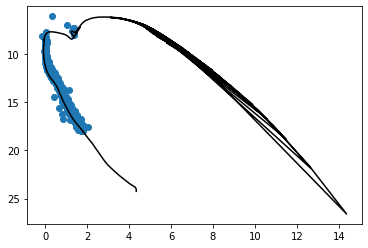

In [21]:
#isocrona = isocrona[isocrona['Gmag']<20]
plt.scatter(ngc['BP-RP'],ngc['Gmag'])
Av = 0.27
E = Av/3.1
plt.plot(isocrona['G_BPmag']-isocrona['G_RPmag'] + E,isocrona['Gmag']+10 + Av, color ='k')
plt.gca().invert_yaxis()